In [1]:
import pandas as pd
from util import DbHelper
from util.defaults import db2covid as db_options

# Instantiate DbHelper class for executing
# query to database
db = DbHelper(db_options)

In [2]:
min_date = str(db.execute("SELECT MIN(date) FROM COVID19_OPEN_DATA").values.tolist()[0][0])
max_date = str(db.execute("SELECT MAX(date) FROM COVID19_OPEN_DATA").values.tolist()[0][0])

In [3]:
# Options
sr1_code = ''
ndays = 14
lcc_colname = 'LEAD_%dDAYS' % (ndays)

In [4]:
date_index = pd.date_range(start=min_date, end=max_date)

In [5]:
sql = "SELECT DATE, CUMULATIVE_CONFIRMED FROM COVID19_CUMULATIVE_DATA WHERE SUBREGION1_CODE='%s'" % (sr1_code)

cum_confirmed = db.execute(sql)
cum_confirmed.index = date_index

In [6]:
lead_cum_confirmed = db.lead_cum_confirmed_date_range(min_date, max_date, sr1_code, ndays)
lead_cum_confirmed.index = date_index
lead_cum_confirmed.columns = [lcc_colname]

<AxesSubplot:>

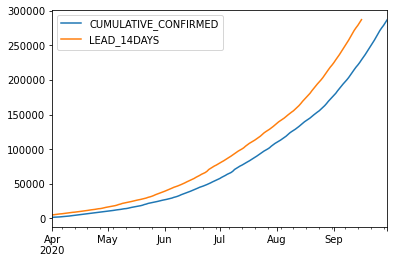

In [7]:
confirmed = pd.concat([cum_confirmed, lead_cum_confirmed], axis=1)

confirmed.plot()

In [8]:
sql = "SELECT "+ \
      "MOBILITY_RETAIL_AND_RECREATION " + \
      "FROM COVID19_DAILY_MOBILITY_CHANGES "+ \
      "WHERE SUBREGION1_CODE='%s'" % (sr1_code)

In [9]:
mobility = db.execute(sql)
mobility.index = date_index

<AxesSubplot:xlabel='MOBILITY_RETAIL_AND_RECREATION', ylabel='LEAD_14DAYS'>

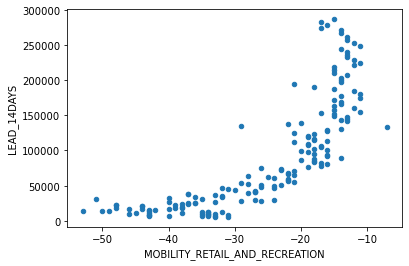

In [10]:
confirmed_vs_mobility = pd.concat([confirmed, mobility], axis=1)

confirmed_vs_mobility.plot.scatter(x='MOBILITY_RETAIL_AND_RECREATION', y=lcc_colname)

In [11]:
confirmed_vs_mobility.loc[confirmed_vs_mobility.MOBILITY_RETAIL_AND_RECREATION > -10]

,DATE,CUMULATIVE_CONFIRMED,LEAD_14DAYS,MOBILITY_RETAIL_AND_RECREATION
2020-07-30,2020-07-30,106336,132816.0,-7


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
covid_X = confirmed_vs_mobility.MOBILITY_RETAIL_AND_RECREATION

covid_Y = confirmed_vs_mobility[lcc_colname]

covid_X = np.array(covid_X.values.tolist()).reshape(-1, 1)
covid_Y = np.array(covid_Y.values.tolist()).reshape(-1, 1)

In [13]:
covid_X

array([[-31],
       [-33],
       [-35],
       [-40],
       [-43],
       [-34],
       [-33],
       [-34],
       [-31],
       [-43],
       [-43],
       [-46],
       [-33],
       [-34],
       [-35],
       [-34],
       [-38],
       [-43],
       [-45],
       [-34],
       [-35],
       [-34],
       [-32],
       [-49],
       [-50],
       [-53],
       [-43],
       [-43],
       [-42],
       [-40],
       [-44],
       [-46],
       [-48],
       [-38],
       [-39],
       [-38],
       [-44],
       [-44],
       [-48],
       [-48],
       [-39],
       [-38],
       [-37],
       [-36],
       [-36],
       [-37],
       [-40],
       [-33],
       [-29],
       [-26],
       [-24],
       [-27],
       [-35],
       [-51],
       [-40],
       [-36],
       [-32],
       [-32],
       [-33],
       [-37],
       [-37],
       [-28],
       [-27],
       [-27],
       [-27],
       [-30],
       [-31],
       [-32],
       [-24],
       [-26],
       [-24],
      

In [14]:
covid_Y

array([[  5136.],
       [  5516.],
       [  5923.],
       [  6248.],
       [  6575.],
       [  6760.],
       [  7135.],
       [  7418.],
       [  7775.],
       [  8211.],
       [  8607.],
       [  8882.],
       [  9096.],
       [  9511.],
       [  9771.],
       [ 10118.],
       [ 10551.],
       [ 10843.],
       [ 11192.],
       [ 11587.],
       [ 12071.],
       [ 12438.],
       [ 12776.],
       [ 13112.],
       [ 13645.],
       [ 14032.],
       [ 14265.],
       [ 14749.],
       [ 15438.],
       [ 16006.],
       [ 16496.],
       [ 17025.],
       [ 17514.],
       [ 18010.],
       [ 18496.],
       [ 19189.],
       [ 20162.],
       [ 20796.],
       [ 21745.],
       [ 22271.],
       [ 22750.],
       [ 23165.],
       [ 23851.],
       [ 24538.],
       [ 25216.],
       [ 25773.],
       [ 26473.],
       [ 26940.],
       [ 27549.],
       [ 28233.],
       [ 28818.],
       [ 29521.],
       [ 30514.],
       [ 31186.],
       [ 32033.],
       [ 3

In [26]:
covid_X_unknown = covid_X[-14:]

covid_X = covid_X[:-14] # Ada null value
covid_Y = covid_Y[:-14] # Ada null value

In [49]:
# Split the data into training/testing sets
covid_X_train = covid_X[:-100]
covid_X_test = covid_X[-100:]

# Split the targets into training/testing sets
covid_Y_train = covid_Y[:-100]
covid_Y_test = covid_Y[-100:]

In [52]:
covid_Y_train

array([[135123.],
       [ 29521.],
       [ 28233.],
       [ 45029.],
       [  6248.],
       [ 83130.],
       [ 97286.],
       [ 43803.],
       [  8607.],
       [ 42762.],
       [  7418.],
       [ 12776.],
       [151498.],
       [  6575.],
       [ 93657.],
       [130718.],
       [ 40400.],
       [ 14265.],
       [ 17514.],
       [ 46845.],
       [ 18496.],
       [ 91751.],
       [ 25773.],
       [149408.],
       [  6760.],
       [ 25216.],
       [153535.],
       [144945.],
       [113134.],
       [ 28818.],
       [ 88214.],
       [137468.],
       [160165.],
       [ 41431.],
       [ 64958.],
       [  8211.],
       [  7775.],
       [ 22750.],
       [ 23165.],
       [ 36406.],
       [ 47896.],
       [ 80094.],
       [ 34316.],
       [ 74018.],
       [ 13645.],
       [ 49009.],
       [  5923.],
       [128776.],
       [165887.],
       [111455.],
       [ 38277.],
       [162884.],
       [ 68079.],
       [ 98778.],
       [ 12438.],
       [ 1

In [53]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [54]:
# Train the model using the training sets
regr.fit(covid_X_train, covid_Y_train)

LinearRegression()

In [55]:
# Make predictions using the testing set
covid_Y_pred = regr.predict(covid_X_test)

In [56]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[3923.40210828]]


In [57]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(covid_Y_test, covid_Y_pred))

Mean squared error: 810123173.16


In [58]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(covid_Y_test, covid_Y_pred))

Coefficient of determination: 0.70


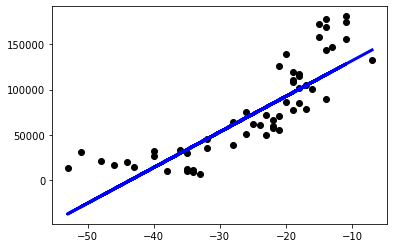

In [59]:
# Plot outputs
plt.scatter(covid_X_test, covid_Y_test,  color='black')
plt.plot(covid_X_test, covid_Y_pred, color='blue', linewidth=3)

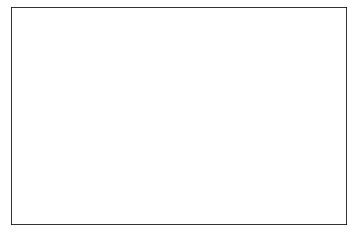

In [61]:
plt.xticks(())
plt.yticks(())

plt.show()

In [51]:
from sklearn.model_selection import train_test_split

# x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)

covid_X_train, covid_X_test,covid_Y_train,covid_Y_test = train_test_split(covid_X,covid_Y,test_size =0.2)